In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
crypto_df = pd.read_csv('Data/crypto_data.csv')
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1252 non-null   object 
 1   CoinName         1252 non-null   object 
 2   Algorithm        1252 non-null   object 
 3   IsTrading        1252 non-null   bool   
 4   ProofType        1252 non-null   object 
 5   TotalCoinsMined  744 non-null    float64
 6   TotalCoinSupply  1252 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 60.0+ KB


In [4]:
crypto_df.describe()

,TotalCoinsMined
count,7.440000e+02
mean,3.883103e+09
std,3.867263e+10
min,-5.917978e+09
25%,6.322164e+05
50%,1.340427e+07
75%,9.399895e+07
max,9.899887e+11


### Remove all rows that have at least one null value.

In [5]:
crypto_df2 = crypto_df.dropna(how="any")
crypto_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 0 to 1248
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       744 non-null    object 
 1   CoinName         744 non-null    object 
 2   Algorithm        744 non-null    object 
 3   IsTrading        744 non-null    bool   
 4   ProofType        744 non-null    object 
 5   TotalCoinsMined  744 non-null    float64
 6   TotalCoinSupply  744 non-null    object 
dtypes: bool(1), float64(1), object(5)
memory usage: 41.4+ KB


### Discard all cryptocurrencies that are not being traded. In other words, filter for currencies that are currently being traded. Once you have done this, drop the IsTrading column from the dataframe.

In [6]:
crypto_df2.IsTrading.value_counts()        

True     685
False     59
Name: IsTrading, dtype: int64

In [7]:
crypto_df3 = crypto_df2[crypto_df2['IsTrading'] == True] 
crypto_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685 entries, 0 to 1247
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       685 non-null    object 
 1   CoinName         685 non-null    object 
 2   Algorithm        685 non-null    object 
 3   IsTrading        685 non-null    bool   
 4   ProofType        685 non-null    object 
 5   TotalCoinsMined  685 non-null    float64
 6   TotalCoinSupply  685 non-null    object 
dtypes: bool(1), float64(1), object(5)
memory usage: 38.1+ KB


In [8]:
crypto_df3.IsTrading.value_counts() 

True    685
Name: IsTrading, dtype: int64

In [9]:
crypto_df4 = crypto_df3.drop(['IsTrading'], axis = 1)
crypto_df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685 entries, 0 to 1247
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       685 non-null    object 
 1   CoinName         685 non-null    object 
 2   Algorithm        685 non-null    object 
 3   ProofType        685 non-null    object 
 4   TotalCoinsMined  685 non-null    float64
 5   TotalCoinSupply  685 non-null    object 
dtypes: float64(1), object(5)
memory usage: 37.5+ KB


### Filter for cryptocurrencies that have been mined. That is, the total coins mined should be greater than zero.

In [10]:
crypto_df5 =crypto_df4[crypto_df4['TotalCoinsMined'] > 0]
crypto_df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 1247
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       532 non-null    object 
 1   CoinName         532 non-null    object 
 2   Algorithm        532 non-null    object 
 3   ProofType        532 non-null    object 
 4   TotalCoinsMined  532 non-null    float64
 5   TotalCoinSupply  532 non-null    object 
dtypes: float64(1), object(5)
memory usage: 29.1+ KB


In [11]:
crypto_df5["TotalCoinSupply"] = pd.to_numeric(crypto_df5.TotalCoinSupply)
crypto_df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 1247
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       532 non-null    object 
 1   CoinName         532 non-null    object 
 2   Algorithm        532 non-null    object 
 3   ProofType        532 non-null    object 
 4   TotalCoinsMined  532 non-null    float64
 5   TotalCoinSupply  532 non-null    float64
dtypes: float64(2), object(4)
memory usage: 29.1+ KB


<ipython-input-11-681a3e4fc316>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crypto_df5["TotalCoinSupply"] = pd.to_numeric(crypto_df5.TotalCoinSupply)


In [12]:
crypto_df5.describe()

,TotalCoinsMined,TotalCoinSupply
count,5.320000e+02,5.320000e+02
mean,5.340456e+09,1.034523e+10
std,4.564568e+10,6.773697e+10
min,4.199995e+01,0.000000e+00
25%,8.359849e+06,2.100000e+07
50%,2.474397e+07,7.841760e+07
75%,1.867250e+08,5.000000e+08
max,9.899887e+11,1.000000e+12


### In order for your dataset to be comprehensible to a machine learning algorithm, its data should be numeric. Since the coin names do not contribute to the analysis of the data, delete the CoinName from the original dataframe.

In [13]:
crypto_df6 = crypto_df5.drop(['Unnamed: 0', 'CoinName'], axis = 1)
crypto_df6.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
2,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
5,X13,PoW/PoS,2.927942e+10,3.141593e+11
7,SHA-256,PoW,1.792718e+07,2.100000e+07
8,Ethash,PoW,1.076842e+08,0.000000e+00


In [14]:
crypto_df6.ProofType.value_counts()

PoW                     237
PoW/PoS                 176
PoS                      86
DPoS                      9
PoC                       3
PoS/PoW                   2
HPoW                      1
DPOS                      1
PoW and PoS               1
dPoW/PoW                  1
PoW/PoS                   1
PoW/nPoS                  1
PoW/PoW                   1
PoS/LPoS                  1
TPoS                      1
Pos                       1
PoS/PoW/PoT               1
LPoS                      1
POBh                      1
PoA                       1
Proof of Authority        1
PoW + Hive                1
Zero-Knowledge Proof      1
Proof of Trust            1
PoST                      1
Name: ProofType, dtype: int64

In [19]:
crypto_df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 1247
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Algorithm        532 non-null    object 
 1   ProofType        532 non-null    object 
 2   TotalCoinsMined  532 non-null    float64
 3   TotalCoinSupply  532 non-null    float64
dtypes: float64(2), object(2)
memory usage: 20.8+ KB


In [15]:
crypto_df7 = crypto_df6.replace(
    {"PoW/PoS ": "PoW/PoS", "PoW and PoS": "PoW/PoS", "Proof of Authority": "PoA", "Pos": "PoS", "Proof of Trust": "PoT"})
crypto_df7.ProofType.value_counts()

PoW                     237
PoW/PoS                 178
PoS                      87
DPoS                      9
PoC                       3
PoS/PoW                   2
PoA                       2
HPoW                      1
dPoW/PoW                  1
PoW + Hive                1
PoW/nPoS                  1
PoW/PoW                   1
TPoS                      1
PoS/LPoS                  1
DPOS                      1
PoS/PoW/PoT               1
LPoS                      1
POBh                      1
PoT                       1
Zero-Knowledge Proof      1
PoST                      1
Name: ProofType, dtype: int64

In [16]:
print(f"Duplicate entries: {crypto_df7.duplicated().sum()}")

Duplicate entries: 1


### Your next step in data preparation is to convert the remaining features with text values, Algorithm and ProofType, into numerical data. To accomplish this task, use Pandas to create dummy variables. Examine the number of rows and columns of your dataset now. 

In [17]:
crypto_df7 = pd.get_dummies(crypto_df7)
crypto_df7.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,Algorithm_Counterparty,Algorithm_CryptoNight,Algorithm_CryptoNight Heavy,Algorithm_CryptoNight-V7,Algorithm_Cryptonight-GPU,Algorithm_DPoS,Algorithm_Dagger,Algorithm_Dagger-Hashimoto,Algorithm_ECC 256K1,Algorithm_Equihash,Algorithm_Equihash+Scrypt,Algorithm_Ethash,Algorithm_Exosis,Algorithm_Green Protocol,Algorithm_Groestl,Algorithm_HMQ1725,Algorithm_HybridScryptHash256,Algorithm_IMesh,Algorithm_Jump Consistent Hash,Algorithm_Keccak,Algorithm_Leased POS,Algorithm_Lyra2RE,Algorithm_Lyra2REv2,Algorithm_Lyra2Z,Algorithm_M7 POW,Algorithm_Multiple,Algorithm_NIST5,Algorithm_NeoScrypt,Algorithm_Ouroboros,Algorithm_PHI1612,Algorithm_POS 2.0,Algorithm_POS 3.0,Algorithm_PoS,Algorithm_Proof-of-Authority,Algorithm_Proof-of-BibleHash,Algorithm_QUAIT,Algorithm_QuBit,Algorithm_Quark,Algorithm_SHA-256,Algorithm_SHA-256 + Hive,Algorithm_SHA-256D,Algorithm_SHA-512,Algorithm_SHA3,Algorithm_Scrypt,Algorithm_Semux BFT consensus,Algorithm_Shabal256,Algorithm_Skein,Algorithm_SkunkHash,Algorithm_SkunkHash v2 Raptor,Algorithm_Stanford Folding,Algorithm_TRC10,Algorithm_Time Travel,Algorithm_Tribus,Algorithm_VBFT,Algorithm_VeChainThor Authority,Algorithm_X11,Algorithm_X11GOST,Algorithm_X13,Algorithm_X14,Algorithm_X15,Algorithm_X16R,Algorithm_XEVAN,ProofType_DPOS,ProofType_DPoS,ProofType_HPoW,ProofType_LPoS,ProofType_POBh,ProofType_PoA,ProofType_PoC,ProofType_PoS,ProofType_PoS/LPoS,ProofType_PoS/PoW,ProofType_PoS/PoW/PoT,ProofType_PoST,ProofType_PoT,ProofType_PoW,ProofType_PoW + Hive,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [18]:
crypto_df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 1247
Data columns (total 94 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   TotalCoinsMined                   532 non-null    float64
 1   TotalCoinSupply                   532 non-null    float64
 2   Algorithm_1GB AES Pattern Search  532 non-null    uint8  
 3   Algorithm_536                     532 non-null    uint8  
 4   Algorithm_Argon2d                 532 non-null    uint8  
 5   Algorithm_BLAKE256                532 non-null    uint8  
 6   Algorithm_Blake                   532 non-null    uint8  
 7   Algorithm_Blake2S                 532 non-null    uint8  
 8   Algorithm_Blake2b                 532 non-null    uint8  
 9   Algorithm_C11                     532 non-null    uint8  
 10  Algorithm_Cloverhash              532 non-null    uint8  
 11  Algorithm_Counterparty            532 non-null    uint8  
 12  Algorit

## How did they change? The number of rows remained the same and the number of columns increased by 90. 

# Scale

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
scaler = scaler.fit(crypto_df7.loc[:, ["TotalCoinsMined", "TotalCoinSupply"]])

In [22]:
final_crypto = crypto_df7.copy()

final_crypto.loc[:, ["TotalCoinsMined", "TotalCoinSupply"]] = scaler.transform(crypto_df7.loc[:, ["TotalCoinsMined", "TotalCoinSupply"]])
final_crypto.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,Algorithm_Counterparty,Algorithm_CryptoNight,Algorithm_CryptoNight Heavy,Algorithm_CryptoNight-V7,Algorithm_Cryptonight-GPU,Algorithm_DPoS,Algorithm_Dagger,Algorithm_Dagger-Hashimoto,Algorithm_ECC 256K1,Algorithm_Equihash,Algorithm_Equihash+Scrypt,Algorithm_Ethash,Algorithm_Exosis,Algorithm_Green Protocol,Algorithm_Groestl,Algorithm_HMQ1725,Algorithm_HybridScryptHash256,Algorithm_IMesh,Algorithm_Jump Consistent Hash,Algorithm_Keccak,Algorithm_Leased POS,Algorithm_Lyra2RE,Algorithm_Lyra2REv2,Algorithm_Lyra2Z,Algorithm_M7 POW,Algorithm_Multiple,Algorithm_NIST5,Algorithm_NeoScrypt,Algorithm_Ouroboros,Algorithm_PHI1612,Algorithm_POS 2.0,Algorithm_POS 3.0,Algorithm_PoS,Algorithm_Proof-of-Authority,Algorithm_Proof-of-BibleHash,Algorithm_QUAIT,Algorithm_QuBit,Algorithm_Quark,Algorithm_SHA-256,Algorithm_SHA-256 + Hive,Algorithm_SHA-256D,Algorithm_SHA-512,Algorithm_SHA3,Algorithm_Scrypt,Algorithm_Semux BFT consensus,Algorithm_Shabal256,Algorithm_Skein,Algorithm_SkunkHash,Algorithm_SkunkHash v2 Raptor,Algorithm_Stanford Folding,Algorithm_TRC10,Algorithm_Time Travel,Algorithm_Tribus,Algorithm_VBFT,Algorithm_VeChainThor Authority,Algorithm_X11,Algorithm_X11GOST,Algorithm_X13,Algorithm_X14,Algorithm_X15,Algorithm_X16R,Algorithm_XEVAN,ProofType_DPOS,ProofType_DPoS,ProofType_HPoW,ProofType_LPoS,ProofType_POBh,ProofType_PoA,ProofType_PoC,ProofType_PoS,ProofType_PoS/LPoS,ProofType_PoS/PoW,ProofType_PoS/PoW/PoT,ProofType_PoST,ProofType_PoT,ProofType_PoW,ProofType_PoW + Hive,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,-0.117108,-0.152870,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,-0.093970,-0.145009,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,0.524946,4.489424,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7,-0.116715,-0.152560,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8,-0.114747,-0.152870,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [23]:
final_crypto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 1247
Data columns (total 94 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   TotalCoinsMined                   532 non-null    float64
 1   TotalCoinSupply                   532 non-null    float64
 2   Algorithm_1GB AES Pattern Search  532 non-null    uint8  
 3   Algorithm_536                     532 non-null    uint8  
 4   Algorithm_Argon2d                 532 non-null    uint8  
 5   Algorithm_BLAKE256                532 non-null    uint8  
 6   Algorithm_Blake                   532 non-null    uint8  
 7   Algorithm_Blake2S                 532 non-null    uint8  
 8   Algorithm_Blake2b                 532 non-null    uint8  
 9   Algorithm_C11                     532 non-null    uint8  
 10  Algorithm_Cloverhash              532 non-null    uint8  
 11  Algorithm_Counterparty            532 non-null    uint8  
 12  Algorit

In [24]:
final_crypto.describe()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,Algorithm_Counterparty,Algorithm_CryptoNight,Algorithm_CryptoNight Heavy,Algorithm_CryptoNight-V7,Algorithm_Cryptonight-GPU,Algorithm_DPoS,Algorithm_Dagger,Algorithm_Dagger-Hashimoto,Algorithm_ECC 256K1,Algorithm_Equihash,Algorithm_Equihash+Scrypt,Algorithm_Ethash,Algorithm_Exosis,Algorithm_Green Protocol,Algorithm_Groestl,Algorithm_HMQ1725,Algorithm_HybridScryptHash256,Algorithm_IMesh,Algorithm_Jump Consistent Hash,Algorithm_Keccak,Algorithm_Leased POS,Algorithm_Lyra2RE,Algorithm_Lyra2REv2,Algorithm_Lyra2Z,Algorithm_M7 POW,Algorithm_Multiple,Algorithm_NIST5,Algorithm_NeoScrypt,Algorithm_Ouroboros,Algorithm_PHI1612,Algorithm_POS 2.0,Algorithm_POS 3.0,Algorithm_PoS,Algorithm_Proof-of-Authority,Algorithm_Proof-of-BibleHash,Algorithm_QUAIT,Algorithm_QuBit,Algorithm_Quark,Algorithm_SHA-256,Algorithm_SHA-256 + Hive,Algorithm_SHA-256D,Algorithm_SHA-512,Algorithm_SHA3,Algorithm_Scrypt,Algorithm_Semux BFT consensus,Algorithm_Shabal256,Algorithm_Skein,Algorithm_SkunkHash,Algorithm_SkunkHash v2 Raptor,Algorithm_Stanford Folding,Algorithm_TRC10,Algorithm_Time Travel,Algorithm_Tribus,Algorithm_VBFT,Algorithm_VeChainThor Authority,Algorithm_X11,Algorithm_X11GOST,Algorithm_X13,Algorithm_X14,Algorithm_X15,Algorithm_X16R,Algorithm_XEVAN,ProofType_DPOS,ProofType_DPoS,ProofType_HPoW,ProofType_LPoS,ProofType_POBh,ProofType_PoA,ProofType_PoC,ProofType_PoS,ProofType_PoS/LPoS,ProofType_PoS/PoW,ProofType_PoS/PoW/PoT,ProofType_PoST,ProofType_PoT,ProofType_PoW,ProofType_PoW + Hive,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
count,5.320000e+02,5.320000e+02,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,3.599877e-18,-2.989463e-17,0.001880,0.001880,0.001880,0.003759,0.005639,0.001880,0.003759,0.003759,0.001880,0.001880,0.035714,0.003759,0.009398,0.001880,0.013158,0.005639,0.001880,0.001880,0.022556,0.001880,0.016917,0.001880,0.001880,0.007519,0.001880,0.001880,0.001880,0.001880,0.003759,0.001880,0.007519,0.007519,0.007519,0.001880,0.016917,0.018797,0.018797,0.001880,0.003759,0.001880,0.005639,0.031955,0.001880,0.001880,0.001880,0.005639,0.024436,0.090226,0.001880,0.007519,0.005639,0.003759,0.342105,0.001880,0.001880,0.003759,0.001880,0.001880,0.001880,0.001880,0.001880,0.001880,0.001880,0.001880,0.137218,0.001880,0.031955,0.001880,0.007519,0.007519,0.011278,0.001880,0.016917,0.001880,0.001880,0.001880,0.003759,0.005639,0.163534,0.001880,0.003759,0.001880,0.001880,0.001880,0.445489,0.001880,0.334586,0.001880,0.001880,0.001880,0.001880,0.001880
std,1.000941e+00,1.000941e+00,0.043355,0.043355,0.043355,0.061256,0.074952,0.043355,0.061256,0.061256,0.043355,0.043355,0.185752,0.061256,0.096580,0.043355,0.114058,0.074952,0.043355,0.043355,0.148624,0.043355,0.129083,0.043355,0.043355,0.086466,0.043355,0.043355,0.043355,0.043355,0.061256,

# TSNE

In [25]:
from sklearn.manifold import TSNE

In [26]:
tsne = TSNE(learning_rate=35)
# Reduce dimensions
tsne_features = tsne.fit_transform(final_crypto)
tsne_features.shape

(532, 2)

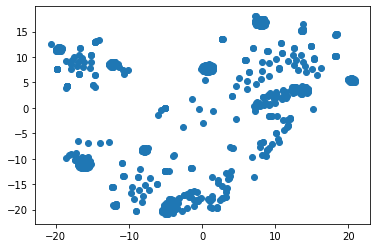

In [27]:
# Visualize the clusters
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

# PCA 

In [28]:
from sklearn.decomposition import PCA

In [29]:
pca = PCA()
pca.fit(final_crypto)
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))

[4.86144130e-01 1.12847212e-01 8.45960792e-02 7.32508093e-02
 5.77306595e-02 3.17660063e-02 1.97031162e-02 9.52271975e-03
 8.92066253e-03 8.21403709e-03 7.70118235e-03 6.28819177e-03
 5.84877136e-03 5.28749132e-03 4.91337373e-03 4.80729200e-03
 3.99735722e-03 3.58612184e-03 3.08181848e-03 2.57597086e-03
 2.14115526e-03 2.14115526e-03 2.14114718e-03 2.14049574e-03
 2.12771942e-03 2.04914070e-03 1.84226967e-03 1.74607547e-03
 1.70605685e-03 1.60585516e-03 1.60125900e-03 1.52901629e-03
 1.47672963e-03 1.36767814e-03 1.26603922e-03 1.07747272e-03
 1.07057763e-03 1.07057763e-03 1.07057763e-03 1.07057763e-03
 1.07057763e-03 1.06898100e-03 1.06334477e-03 1.05790525e-03
 1.02509486e-03 9.85277904e-04 7.99635191e-04 7.04929971e-04
 5.35288814e-04 5.35288814e-04 5.35288814e-04 5.35288814e-04
 5.35288814e-04 5.35288814e-04 5.35288814e-04 5.35288814e-04
 5.35288814e-04 5.35288814e-04 5.35288814e-04 5.35288814e-04
 5.35288814e-04 5.35288814e-04 5.35288814e-04 5.35288814e-04
 5.35288814e-04 5.352888

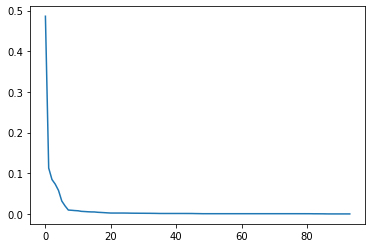

In [30]:
plt.plot(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.show()

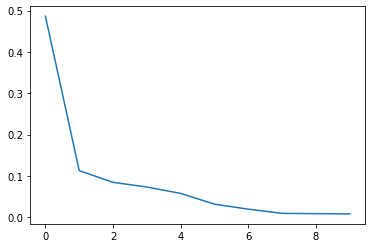

In [31]:
plt.plot(range(10), pca.explained_variance_ratio_[0:10])
plt.show()

In [32]:
np.sum(pca.explained_variance_ratio_[0:11])

0.9003966141784739

In [33]:
pca = PCA(n_components=0.90)
pca.fit(final_crypto)
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))

[0.48614413 0.11284721 0.08459608 0.07325081 0.05773066 0.03176601
 0.01970312 0.00952272 0.00892066 0.00821404 0.00770118]
0.9003966141784739


In [34]:
print(len(pca.explained_variance_ratio_))

11


In [35]:
crypto_pca = pca.transform(final_crypto)
crypto_pca = pd.DataFrame(crypto_pca, columns = ["PCA"+ str(x) for x in range(1, len(pca.explained_variance_ratio_) + 1)])
crypto_pca.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11
0,-0.209691,-0.808170,0.168907,-0.663340,-0.004221,-0.025304,0.002418,-0.012781,-0.046990,-0.021372,-0.007774
1,-0.187805,-0.810617,0.158472,-0.664012,-0.004872,-0.025161,0.002526,-0.013793,-0.047109,-0.021429,-0.007660
2,3.529267,-0.317246,2.910638,0.416936,-0.203725,-0.261915,-0.282133,-0.137953,0.753249,0.347229,-0.241091
3,-0.179927,0.699969,-0.165025,0.220439,-0.285466,-0.616501,0.622780,-0.016936,0.028175,0.008040,-0.026113
4,-0.173063,0.693041,-0.152954,0.115317,-0.215415,-0.104622,-0.242670,0.010629,0.111604,-0.125831,0.059776


# TSNE w/PCA

In [36]:
tsne = TSNE(learning_rate=35)
# Reduce dimensions
tsne_features = tsne.fit_transform(crypto_pca)
tsne_features.shape

(532, 2)

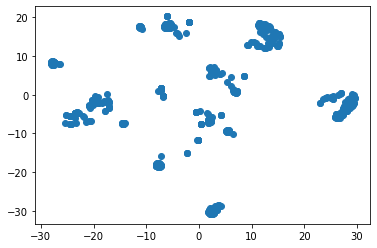

In [37]:
# Visualize the clusters
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

# KMeans w/PCA

In [38]:
from sklearn.cluster import KMeans

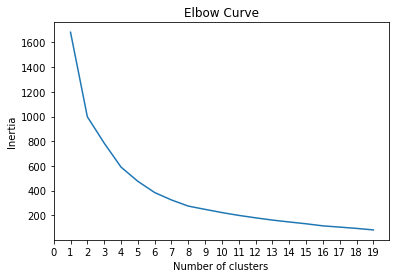

In [39]:
# Finding the best value for k
inertia = []
k = list(range(1, 20))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(20)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [44]:
# Predicting clusters with k=8

# Initialize the k-means model
model = KMeans(n_clusters=6, random_state=0)

# Fit the model
model.fit(crypto_pca)

# Predict clusters
predictions = model.predict(crypto_pca)

# Add the predicted class column to the dataframe
crypto_pca["class"] = model.labels_
crypto_pca.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,class
0,-0.209691,-0.808170,0.168907,-0.663340,-0.004221,-0.025304,0.002418,-0.012781,-0.046990,-0.021372,-0.007774,4
1,-0.187805,-0.810617,0.158472,-0.664012,-0.004872,-0.025161,0.002526,-0.013793,-0.047109,-0.021429,-0.007660,4
2,3.529267,-0.317246,2.910638,0.416936,-0.203725,-0.261915,-0.282133,-0.137953,0.753249,0.347229,-0.241091,5
3,-0.179927,0.699969,-0.165025,0.220439,-0.285466,-0.616501,0.622780,-0.016936,0.028175,0.008040,-0.026113,0
4,-0.173063,0.693041,-0.152954,0.115317,-0.215415,-0.104622,-0.242670,0.010629,0.111604,-0.125831,0.059776,0


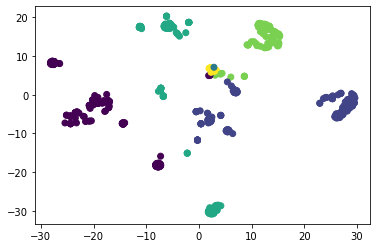

In [45]:
# Visualize the clusters
plt.scatter(tsne_features[:,0], tsne_features[:,1], c=crypto_pca["class"])
plt.show()

In [46]:
crypto_pca["class"].value_counts()

1    163
0    154
3    122
4     85
5      7
2      1
Name: class, dtype: int64

# Analysis

#### I believe the cryptocurrencies can be clustered together because many of the coins have similar features that created 6 clusters. This is better displayed in the kMeans w/PCA visualization. After analyzing the elbow curve, there were several possible points in which the coins could be clustered (2,4,6,8). The TSNE only visualization was very noisy and hard to identify hardly any clusters.   